We first need to load the spinGlass data and modules.

In [1]:
from RRR import *
from linProject import *
from spinGlassProject import *
from rankProject import *

n = 40

f = open('spinglassH', 'r')
l = f.readlines()
f.close()
ll = [line.split() for line in l]
lll = [[float(s) for s in line] for line in ll]
H = np.array(lll)

A = semiDefProject(np.random.rand(n, n)*2 - 1)

print spinGlassProject(A)

[[ 1.  1.  1. ..., -1. -1. -1.]
 [ 1.  1.  1. ..., -1. -1. -1.]
 [ 1.  1.  1. ..., -1. -1. -1.]
 ..., 
 [-1. -1. -1. ...,  1.  1.  1.]
 [-1. -1. -1. ...,  1.  1.  1.]
 [-1. -1. -1. ...,  1.  1.  1.]]


Now, we should really test the setup. I recall from class that the true minimum energy was around $-230$, so let's try projecting onto $-200$.

In [2]:
target = -200.

A = semiDefProject(2*np.random.rand(n, n)-1)

Y, errors, sols = RRR(A, 
                    lambda x: lowerBoundProject(x, H, target), 
                    spinGlassProject,
                    0.5, 1e-12, 10000, True)

In [3]:
print sols

[[ 1.  1.  1. ...,  1. -1. -1.]
 [ 1.  1.  1. ...,  1. -1. -1.]
 [ 1.  1.  1. ...,  1. -1. -1.]
 ..., 
 [ 1.  1.  1. ...,  1. -1. -1.]
 [-1. -1. -1. ..., -1.  1.  1.]
 [-1. -1. -1. ..., -1.  1.  1.]]


In [4]:
spins = extractSpins(sols)
print spins

print np.sum(np.outer(spins, spins)*H)

[-1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1. -1. -1.
  1. -1.  1. -1.  1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1. -1. -1. -1.
  1. -1.  1.  1.]
-256.678503498


Code ran for about 5 seconds.

We definitely have an arrangement at $E=-256.6$.

What about something lower?

In [10]:
target = -260

A = semiDefProject(2*np.random.rand(n, n)-1)

Y, errors, sols = RRR(A, 
                    lambda x: lowerBoundProject(x, H, target), 
                    spinGlassProject,
                    0.5, 1e-12, 10000, True)

In [14]:
spins = extractSpins(sols)

print spins

print np.sum(np.outer(spins, spins)*H)

[-1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.
 -1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.
  1.  1. -1. -1.]
-271.315747542


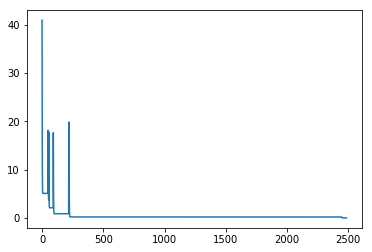

In [15]:
plt.plot(errors)
plt.show()

### How low can we go?

Well, the below calculation gives the standard deviation of a "typical" set of spins.

In [21]:
total =  np.sum(np.abs(H))
num =  40*39.

ave = total/num

sig = np.sqrt(num)*ave
print sig



44.8867187413


What we really have is a Gumbel distribution, with $2^{40}$ samples.

We can approximate the minimum expected value as


In [22]:
exp = 0 - sig*np.sqrt(2*40*math.log(2))
print exp

-334.253207361


Let's go for that target.

In [23]:
target = -320

A = semiDefProject(2*np.random.rand(n, n)-1)

Y, errors, sols = RRR(A, 
                    lambda x: lowerBoundProject(x, H, target), 
                    spinGlassProject,
                    0.5, 1e-12, 10000, True)

In [24]:
spins = extractSpins(sols)

print spins

print np.sum(np.outer(spins, spins)*H)

[-1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1.
  1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.
  1. -1. -1.  1.]
-362.608228638


Clearly, we did much better than we expected.

Let's see how much further we can push this.

In [25]:
target = -365

A = semiDefProject(2*np.random.rand(n, n)-1)

Y, errors, sols = RRR(A, 
                    lambda x: lowerBoundProject(x, H, target), 
                    spinGlassProject,
                    0.5, 1e-12, 10000, True)

In [26]:
print errors[-1]

0.0173340397736


We didn't reach 1e-12, but we did get close enough to extract spins.

In [28]:
spins = extractSpins(sols)

print spins

print np.sum(np.outer(spins, spins)*H)

[-1.  1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.  1. -1.
 -1.  1. -1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1.  1.
 -1. -1. -1. -1.]
-364.021419534


So, we are very close to a solution. This is a better minimum than before, but we didn't reach $-365$.

Just to check, let's do something slightly $more$ ambitious -- and therefore, a stronger projection. If we can't get something, I'll assume we really just found the ground state.

In [29]:
target = -370

A = semiDefProject(2*np.random.rand(n, n)-1)

Y, errors, sols = RRR(A, 
                    lambda x: lowerBoundProject(x, H, target), 
                    spinGlassProject,
                    0.5, 1e-12, 10000, True)

In [30]:
spins = extractSpins(sols)

print spins

print np.sum(np.outer(spins, spins)*H)

[-1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1.
  1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.
  1.  1. -1.  1.]
-393.090235212


I knew it! So we can get even lower!

Can we go for $400$?

In [31]:
target = -400

A = semiDefProject(2*np.random.rand(n, n)-1)

Y, errors, sols = RRR(A, 
                    lambda x: lowerBoundProject(x, H, target), 
                    spinGlassProject,
                    0.5, 1e-12, 10000, True)

In [32]:
spins = extractSpins(sols)

print spins

print np.sum(np.outer(spins, spins)*H)

[-1.  1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1.
  1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1.
 -1. -1. -1. -1.]
-404.457010139


It seems we can. What about $415$?

In [33]:
target = -415

A = semiDefProject(2*np.random.rand(n, n)-1)

Y, errors, sols = RRR(A, 
                    lambda x: lowerBoundProject(x, H, target), 
                    spinGlassProject,
                    0.5, 1e-12, 10000, True)

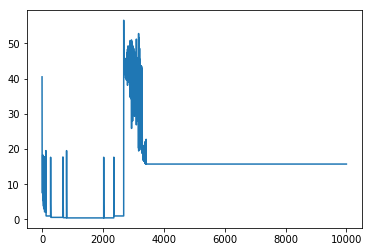

In [35]:
plt.plot(errors)
plt.show()

In [36]:
print Y

[[  1.00000000e+00  -2.34021227e+02   9.96010479e+02 ...,  -1.17319166e+03
    1.11760995e+03   2.77920406e+03]
 [ -2.34021227e+02   1.00000000e+00   1.54579735e+03 ...,   1.05546747e+03
   -1.81773875e+02  -4.45663102e+02]
 [  9.96010479e+02   1.54579735e+03   1.00000000e+00 ...,  -3.88962893e+02
   -4.08419340e+02   1.32292419e+03]
 ..., 
 [ -1.17319166e+03   1.05546747e+03  -3.88962893e+02 ...,   1.00000000e+00
   -2.19923428e+03   4.94818406e+02]
 [  1.11760995e+03  -1.81773875e+02  -4.08419340e+02 ...,  -2.19923428e+03
    1.00000000e+00  -2.84364763e+03]
 [  2.77920406e+03  -4.45663102e+02   1.32292419e+03 ...,   4.94818406e+02
   -2.84364763e+03   1.00000000e+00]]


In [39]:
spins = extractSpins(sols)

print spins

print np.sum(np.outer(spins,spins)*H)

[-1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1.
  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.
  1. -1.  1. -1.]
473.122218973


In [44]:
target = -410

A = semiDefProject(2*np.random.rand(n, n)-1)

Y, errors, sols = RRR(A, 
                    lambda x: lowerBoundProject(x, H, target), 
                    spinGlassProject,
                    0.5, 1e-12, 10000, True)

In [45]:
spins = extractSpins(sols)

print spins

print np.sum(np.outer(spins,spins)*H)

[-1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1.
  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.
  1. -1.  1. -1.]
473.122218973


This is definitely not what we want, although it does seem to be some sort of attractor; I got projected onto this solution multiple times.

I checke the $Y$, and it seems it has some very large coordinates. Possibly, this solution is simply the outermost one, for some reason, so anything that's "shot out" will be projected here.

## Conclusion

I think that $-405$ is either the true ground energy, or very close; it's well below the lowest expected.

I think this problem worked quite well.